In [9]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

df = pd.DataFrame(pd.read_json("../assets/normalized_pyramid_data.json"))

In [3]:
# Get the rows that contain the reigns of the individual rulers

start_reign = df["start_of_reign"].notnull()
end_reign = df["end_of_reign"].notnull()
reign_df = df[start_reign & end_reign]
reign_df

,ruler,gender,relationship,start_of_reign,end_of_reign,length_of_reign,period,dynasty,title,pyramid_texts,...,orientation,exterior_material,state_of_completion,superstructure_type,height,length,width,slope,enclosure_wall_dimensions,notes
0,Djoser,King,None,2630.0,2611.0,19,Old Kingdom,3,Step Pyramid of Djoser,None,...,N-S,Limestone,None,Pyramid,60,121,109,None,None,15 gates
1,Sekhemhet,King,None,2611.0,2603.0,8,Old Kingdom,3,Enclosure and Unfinished Step Pyramid of Sekhe...,None,...,N-S,Stone,Unfinished,Pyramid,7,120,120,None,"536 N/S; 194 E/W, walls 5m tall","unfinished, no limestone casing (Verner mentio..."
2,Nebka?,King,None,2649.0,2630.0,19,Old Kingdom,3,Pyramid of Nebka? Unfinished Pyramid,None,...,E-W,Stone,Unfinished,Pyramid,unknown,200,200,None,enclosure wall oriented N-S,debate over whether this is Pyramid of Nebka
3,Khaba,King,None,2603.0,2599.0,4,Old Kingdom,3,Pyramid of Khaba,None,...,E-W,Stone,Unfinished,Pyramid,20 (unfinished),84,84,None,None,began as step pyramid
4,Huni? Sneferu?,King,None,2599.0,2575.0,24,Old Kingdom,4,Meidum Pyramid,None,...,E-W,Mudbrick,Unfinished,Pyramid,92,144,144,51,None,"limestone casing, causeway 200m, Cult Pyramid ..."
5,Sneferu,King,None,2575.0,2551.0,24,Old Kingdom,4,Bent Pyramid,None,...,E-W,Stone,None,Pyramid,105,188,188,54,None,"limestone casing, Cult Pyramid - 52 m side, 44..."
9,Khufu,King,None,2551.0,2528.0,23,Old Kingdom,4,Pyramid of Khufu/Great Pyramid of Giza,None,...,None,Stone,None,Pyramid,146.59,230.33,230.33,51,None,"Cult Pyramid - 21.75m (base), 51 degree angle,..."
14,Djedefre,King,None,2528.0,2520.0,8,Old Kingdom,4,Pyramid of Djedefre,None,...,E-W,Stone,None,"Pyramid, Temple, Enclosure",68,106.2,106.2,51,None,"Cult Pyramid - 10.5 m base, 65 degree angle"
17,Khafre,King,None,2520.0,2494.0,26,Old Kingdom,4,Pyramid of Khafre,None,...,None,Stone,None,Pyramid,143.5,215,215,53,None,bottom course made of granite
22,Menkaure,King,None,2490.0,2472.0,18,Old Kingdom,4,Pyramid of Menkaure,None,...,None,Stone,None,Pyramid,65,102.2,104.6,51,None,bottom courses made of red granite


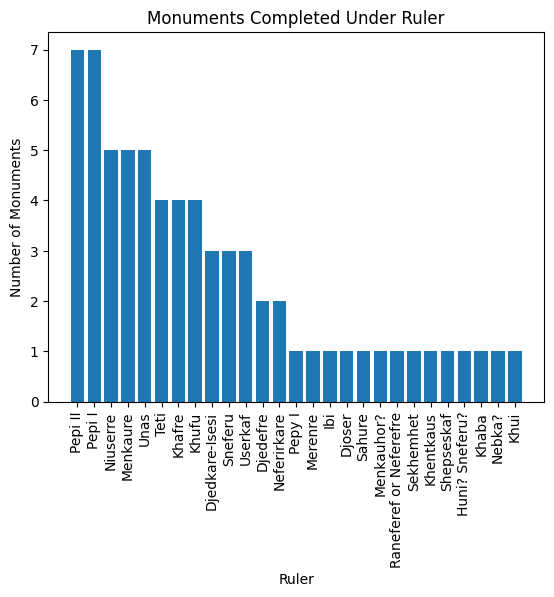

In [4]:
# Plot the number of monuments that were built during the reign of each ruler in a bar graph

monuments = df['ruler'].value_counts()
rulers = df['ruler'].value_counts().keys()

plt.title("Monuments Completed Under Ruler")
plt.xlabel("Ruler")
plt.ylabel("Number of Monuments")
plt.bar(rulers, monuments)
plt.xticks(rotation=90)
plt.show()

/var/folders/q8/nm86scy964318ffbhmh7n8qm0000gr/T/ipykernel_10106/3599429831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynasty_df.dropna(inplace=True)


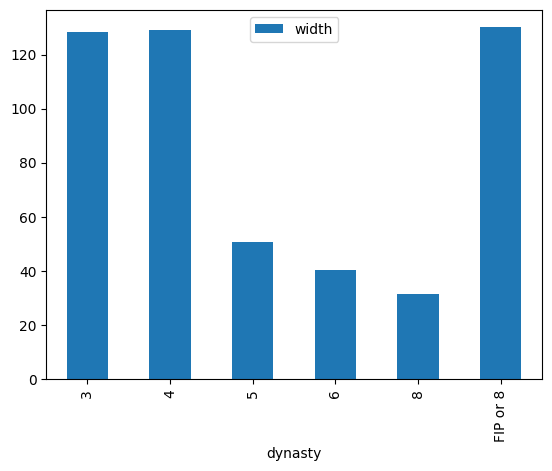

In [10]:
# Plot the average width of the monuments in each Dynasty
# Messy elements are not considered here for the sake of simplicity in this inital exploration,
# they would need to be properly handled in an actual analysis

dynasty_df = df[['dynasty', 'width']]
dynasty_df.dropna(inplace=True)
invalid_widths = dynasty_df['width'].str.contains(' ', na=False)
dynasty_df = dynasty_df[~invalid_widths]
dynasty_df['width'] = dynasty_df['width'].astype('float64')
dynasty_group = dynasty_df.groupby('dynasty').mean().plot.bar()

/var/folders/q8/nm86scy964318ffbhmh7n8qm0000gr/T/ipykernel_10106/3069010384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dynasty', y='width', data=dynasty_df, palette=dyn_pal)


<Axes: xlabel='dynasty', ylabel='width'>

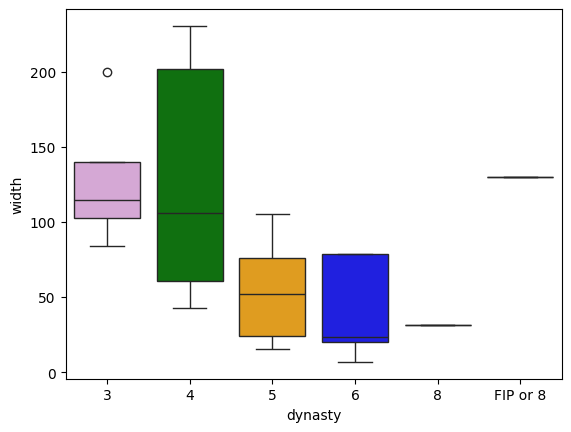

In [19]:
# Same as above but reveals more information (ie better)
sns.color_palette(palette='colorblind')
dyn_pal = {'3': 'plum', '4': 'g', '5': 'orange', '6': 'b', '7': 'r', '8': 'skyblue', 'FIP or 8': 'pink'}
plt = sns.boxplot(x='dynasty', y='width', data=dynasty_df, palette=dyn_pal)
plt.set_title("Average Width of Pyramids During Each Dynasty")
plt.set_xlabel("Dynasty")
plt.set_ylabel("Width")